In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-05-16 07:06:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.62MB/s    in 48s     

2020-05-16 07:06:50 (6.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, '/tmp/rockpaperscissors/hasil_split/train')
validation_dir = os.path.join(base_dir, '/tmp/rockpaperscissors/hasil_split/val')

In [6]:
pip install split-folders

In [7]:
import split_folders
split_folders.fixed('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split", seed=1337, fixed=(100, 100), oversample=False)

Copying files: 2188 files [00:00, 4323.23 files/s]


In [11]:
os.listdir('/tmp/rockpaperscissors/hasil_split/train')
os.listdir('/tmp/rockpaperscissors/hasil_split/val')

['paper', 'scissors', 'rock']

In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1588 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 5s 215ms/step - loss: 1.1199 - accuracy: 0.3000 - val_loss: 1.0944 - val_accuracy: 0.4500
Epoch 2/20
25/25 [==============================] - 5s 209ms/step - loss: 1.0952 - accuracy: 0.3500 - val_loss: 1.0987 - val_accuracy: 0.2500
Epoch 3/20
25/25 [==============================] - 5s 210ms/step - loss: 1.1157 - accuracy: 0.3400 - val_loss: 1.0687 - val_accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 5s 206ms/step - loss: 1.0747 - accuracy: 0.4400 - val_loss: 1.1010 - val_accuracy: 0.3500
Epoch 5/20
25/25 [==============================] - 5s 204ms/step - loss: 1.0577 - accuracy: 0.4900 - val_loss: 0.9526 - val_accuracy: 0.7500
Epoch 6/20
25/25 [==============================] - 5s 204ms/step - loss: 0.8722 - accuracy: 0.6200 - val_loss: 0.8967 - val_accuracy: 0.6000
Epoch 7/20
25/25 [==============================] - 5s 204ms/step - loss: 0.8406 - accuracy: 0.6100 - val_loss: 1.0346 - val_accuracy: 0.3000
Epoch 

Saving neo7ALjpzKdzVCj1.png to neo7ALjpzKdzVCj1 (1).png
[[0. 0. 0.]]
kertas


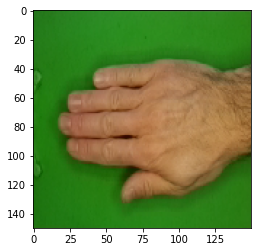

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)
  
  # print(fn)
  print(classes)
  if result==1:
    print('batu')
  elif result==2:
    print('gunting')
  else:
    print('kertas')